In [2]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vao
Processing Record 2 of Set 1 | lorengau
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | sioux lookout
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | biltine
Processing Record 9 of Set 1 | tessalit
Processing Record 10 of Set 1 | mawlaik
Processing Record 11 of Set 1 | dingle
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | fairbanks
Processing Record 16 of Set 1 | juneau
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | buala
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | talara
Processing Record 22 of Set 1 | pingliang
Processing Record 23 of

Processing Record 39 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 4 | charcas
Processing Record 41 of Set 4 | yar-sale
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | lazaro cardenas
Processing Record 44 of Set 4 | new norfolk
Processing Record 45 of Set 4 | tynda
Processing Record 46 of Set 4 | kushima
Processing Record 47 of Set 4 | betsiamites
Processing Record 48 of Set 4 | aden
Processing Record 49 of Set 4 | richards bay
Processing Record 50 of Set 4 | uray
Processing Record 1 of Set 5 | deputatskiy
Processing Record 2 of Set 5 | valparaiso
Processing Record 3 of Set 5 | ucluelet
Processing Record 4 of Set 5 | san ramon
Processing Record 5 of Set 5 | cidreira
Processing Record 6 of Set 5 | jiazi
Processing Record 7 of Set 5 | tasiilaq
Processing Record 8 of Set 5 | bonga
Processing Record 9 of Set 5 | tilichiki
Processing Record 10 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 5 | calu

Processing Record 28 of Set 8 | kirkwall
Processing Record 29 of Set 8 | chimbote
Processing Record 30 of Set 8 | pochutla
Processing Record 31 of Set 8 | buin
Processing Record 32 of Set 8 | padang
Processing Record 33 of Set 8 | bargal
City not found. Skipping...
Processing Record 34 of Set 8 | kushmurun
Processing Record 35 of Set 8 | barra do garcas
Processing Record 36 of Set 8 | hohhot
Processing Record 37 of Set 8 | barguzin
Processing Record 38 of Set 8 | rio grande
Processing Record 39 of Set 8 | aljezur
Processing Record 40 of Set 8 | yulara
Processing Record 41 of Set 8 | scarborough
Processing Record 42 of Set 8 | baghmara
Processing Record 43 of Set 8 | bira
Processing Record 44 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 8 | kirovskiy
Processing Record 46 of Set 8 | paracuru
Processing Record 47 of Set 8 | makakilo city
Processing Record 48 of Set 8 | finnsnes
Processing Record 49 of Set 8 | lima
Processing Record 50 of Set 8 

Processing Record 14 of Set 12 | tarko-sale
Processing Record 15 of Set 12 | zemaiciu naumiestis
Processing Record 16 of Set 12 | selma
Processing Record 17 of Set 12 | forbes
Processing Record 18 of Set 12 | smolyaninovo
Processing Record 19 of Set 12 | carauari
Processing Record 20 of Set 12 | takoradi
Processing Record 21 of Set 12 | celestun
Processing Record 22 of Set 12 | tet
Processing Record 23 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 12 | sebring
Processing Record 25 of Set 12 | kjustendil
Processing Record 26 of Set 12 | sola
Processing Record 27 of Set 12 | kieta
Processing Record 28 of Set 12 | baykit
Processing Record 29 of Set 12 | palora
Processing Record 30 of Set 12 | fuling
Processing Record 31 of Set 12 | sarana
Processing Record 32 of Set 12 | melfort
Processing Record 33 of Set 12 | macara
Processing Record 34 of Set 12 | voh
Processing Record 35 of Set 12 | lamar
Processing Record 36 of Set 12 | jinchang
Processing Record 3

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vao,-22.6667,167.4833,77.22,78,80,12.41,NC,2021-12-04 03:47:06
1,Lorengau,-2.0226,147.2712,83.59,80,68,8.93,PG,2021-12-04 03:47:07
2,Chokurdakh,70.6333,147.9167,-29.49,97,100,8.75,RU,2021-12-04 03:47:07
3,Hermanus,-34.4187,19.2345,59.90,78,83,14.65,ZA,2021-12-04 03:47:08
4,Sioux Lookout,50.1001,-91.9170,23.07,86,90,11.50,CA,2021-12-04 03:42:37
5,Rikitea,-23.1203,-134.9692,76.60,73,71,13.76,PF,2021-12-04 03:43:40
6,Biltine,14.5333,20.9167,71.91,24,0,8.12,TD,2021-12-04 03:47:09
7,Tessalit,20.1986,1.0114,63.54,22,33,10.63,ML,2021-12-04 03:47:09
8,Mawlaik,23.6333,94.4167,79.27,58,52,0.94,MM,2021-12-04 03:47:10
9,Dingle,10.9995,122.6711,81.48,75,94,14.58,PH,2021-12-04 03:47:10


In [11]:
#Reformat DataFrame
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vao,NC,2021-12-04 03:47:06,-22.6667,167.4833,77.22,78,80,12.41
1,Lorengau,PG,2021-12-04 03:47:07,-2.0226,147.2712,83.59,80,68,8.93
2,Chokurdakh,RU,2021-12-04 03:47:07,70.6333,147.9167,-29.49,97,100,8.75
3,Hermanus,ZA,2021-12-04 03:47:08,-34.4187,19.2345,59.90,78,83,14.65
4,Sioux Lookout,CA,2021-12-04 03:42:37,50.1001,-91.9170,23.07,86,90,11.50
5,Rikitea,PF,2021-12-04 03:43:40,-23.1203,-134.9692,76.60,73,71,13.76
6,Biltine,TD,2021-12-04 03:47:09,14.5333,20.9167,71.91,24,0,8.12
7,Tessalit,ML,2021-12-04 03:47:09,20.1986,1.0114,63.54,22,33,10.63
8,Mawlaik,MM,2021-12-04 03:47:10,23.6333,94.4167,79.27,58,52,0.94
9,Dingle,PH,2021-12-04 03:47:10,10.9995,122.6711,81.48,75,94,14.58


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

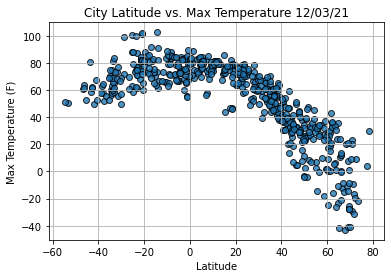

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

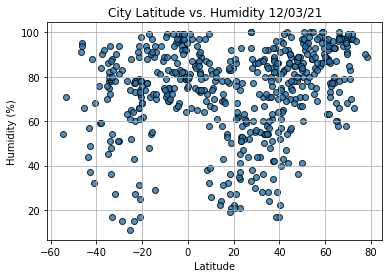

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

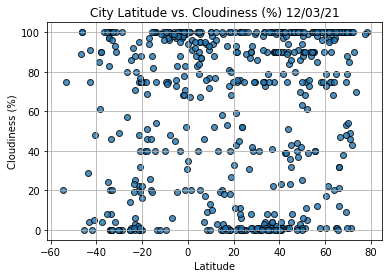

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

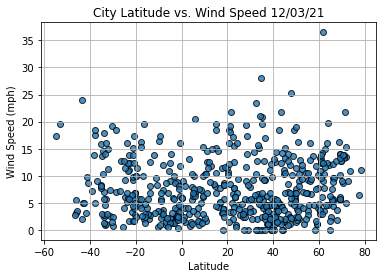

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()